In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [17]:
#reading data
data = pd.read_csv(r"C:\Users\hp\Downloads\car_age_price.csv")
data.head()



,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


<AxesSubplot:>

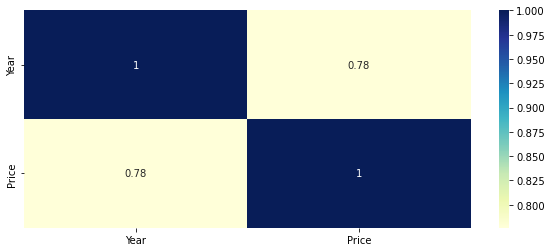

In [16]:
#correlation
corrmatrix = data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True,cmap='YlGnBu')

In [18]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [19]:
#fitting best linear relation between year and price
x = data.drop(['Price'],axis=1)
y = data['Price']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
#Training data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
#Linear Regression model
lr = LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)

In [24]:
from sklearn.metrics import mean_squared_error
print('MSE =',mean_squared_error(y_test,predictions))

MSE = 4326906256.829671


In [25]:
from sklearn.metrics import r2_score
print('R squared value is :', r2_score(y_test,predictions))

R squared value is : 0.36759313425902185


In [26]:
#prediting price fore 2022
predict_2022 = model.predict([[2022]])
pred_2022 = predict_2022[0]


c:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
print('Predicted value for 2022 model 2nd hand Hyundai i10 is Rs.',pred_2022.round())


Predicted value for 2022 model 2nd hand Hyundai i10 is Rs. 743602.0


In [30]:
#lasso regression 
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
x1 = data.drop(['Price'],axis=1)
y1 = data['Price']


In [31]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state=42)

m1 = lasso.fit(x1_train, y1_train)


In [32]:
lasso.score(x1_test, y1_test), lasso.score(x1_train, y1_train)

lasso.coef_
prediction_lasso = m1.predict(x1_test)

print('MSE =',mean_squared_error(y1_test,prediction_lasso))

MSE = 4326859771.015669


In [33]:
from sklearn.metrics import r2_score
print('R squared value is :', r2_score(y1_test,prediction_lasso))


R squared value is : 0.3675999284778446


In [36]:
#compare linear and lasso regression
compare_df = pd.DataFrame({'Mean Squared Error':[mean_squared_error(y_test,predictions),mean_squared_error(y1_test,prediction_lasso)],
                           'R2 value':[r2_score(y_test,predictions),r2_score(y1_test,prediction_lasso)]},index=['Linear Regression','Lasso Regression'])
compare_df

,Mean Squared Error,R2 value
Linear Regression,4.326906e+09,0.367593
Lasso Regression,4.326860e+09,0.367600
